In [95]:
import json

# load the "fakeConversation.json" file
with open("fakeConversation.json",  'r', encoding='utf-8') as json_data_file:
    fake_conversation = json.load(json_data_file)

conversation_raw = fake_conversation["conversation"]

In [96]:
import pandas as pd

# create a dataframe from the conversation
df = pd.DataFrame(conversation_raw)

df

,speaker,message,timestamp
0,Sarah,Salut les filles ! Ça fait trop longtemps ! 😍,2023-04-26 12:00:00
1,Catty,Coucou ! Trop contente de te parler ! 😘,2023-04-26 12:01:00
2,Andrea,"Hey ! Oui, ça fait un bail ! 😊",2023-04-26 12:05:00
3,Sarah,"Alors, racontez-moi, comment se passent vos ét...",2023-04-26 12:07:00
4,Catty,C'est super dur en école d'ingénieur ! Je boss...,2023-04-26 12:12:00
5,Andrea,"Moi, j'ai commencé ma fac de droit, et j'aime ...",2023-04-26 12:19:00
6,Sarah,Moi je suis en école de commerce et franchemen...,2023-04-26 12:25:00
7,Catty,"Oui, on peut dire ça, dans mon école aussi il ...",2023-04-26 12:26:00
8,Andrea,"Dans ma fac de droit, ils pensent souvent que ...",2023-04-26 12:26:00
9,Sarah,C'est dingue ! 😱 Les mecs ne comprennent rien ...,2023-04-26 13:09:00


# Who's talking

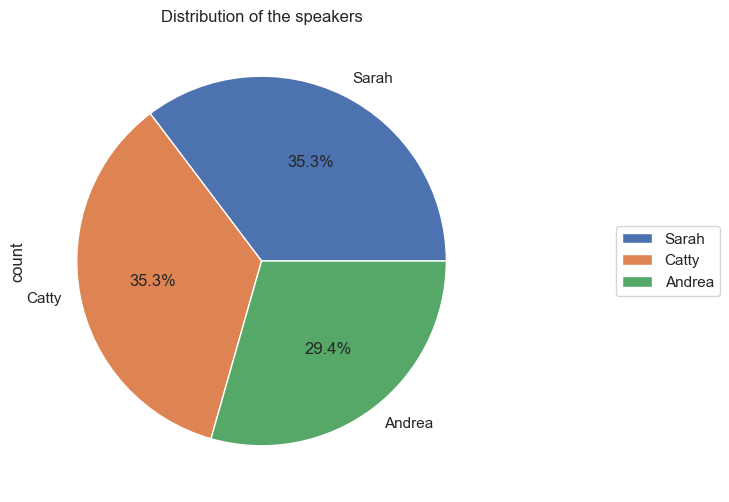

In [97]:
# Make a pieplot of the distribution of the speakers

import matplotlib.pyplot as plt

# make a pieplot of the distribution of the speakers
df["speaker"].value_counts().plot(kind="pie", autopct='%1.1f%%', figsize=(6, 6), title="Distribution of the speakers").legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)
plt.show()

# Counting keywords

In [98]:
from nltk.corpus import stopwords
stopwords = stopwords.words('french')

# Counting the occurence of words in the conversation
word_count = df["message"].str.split(expand=True).stack().value_counts()

# Only keep words and emoji, not punctuation
word_count = word_count[word_count.index.str.contains(r"^[a-zA-Z0-9_]*$")]

# Create a df with every words of the conversation from the "message" column
df_words = df["message"].str.split(expand=True).stack().reset_index(level=1, drop=True).to_frame('word')

# Only keep the words that are used mutiple times
df_words = df_words[df_words["word"].isin(word_count[word_count != 1].index)]

# Remove the stopwords
df_words = df_words[~df_words["word"].isin(stopwords)]

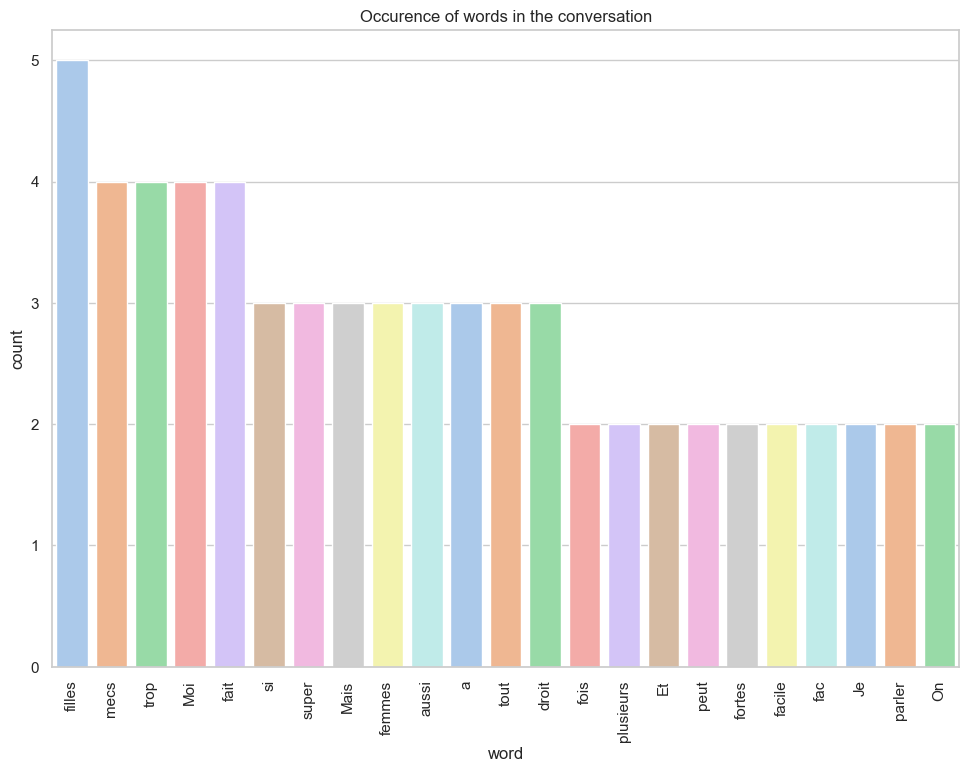

In [99]:
# Counting the occurence of words in the conversation and rendering using seaborn
import seaborn as sns
import matplotlib.pyplot as plt

# Rendering using seaborn
sns.set_theme(style="whitegrid")
sns.countplot(data=df_words, x="word", palette="pastel", order = df_words['word'].value_counts().index)
plt.title("Occurence of words in the conversation")
plt.xticks(rotation=90)
plt.show()

# Distribution of the messages along the day

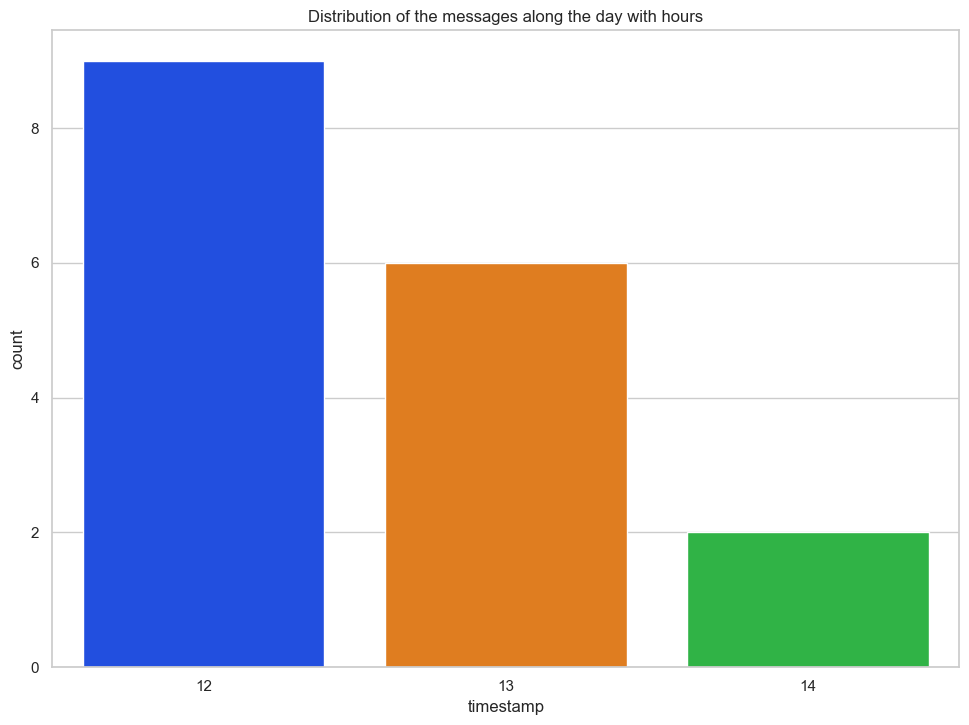

In [106]:
# Make a distribution of the messages occurence along the day with the timestamp column

# Convert the timestamp column to datetime
df["timestamp"] = pd.to_datetime(df["timestamp"], format="%Y-%m-%d %H:%M:%S")



# Make a barplot of the distribution of the messages along the day with hours with seaborn
sns.set_theme(style="whitegrid")
sns.countplot(data=df, x=df["timestamp"].dt.hour, palette="bright")
plt.title("Distribution of the messages along the day with hours")
plt.show()